In [6]:
import pandas as pd
% cd..

/home/tim/workspace/twitter-geoeng


In [7]:
from common.vector_index import VectorIndex
from common.config import settings
import datetime
from typing import Literal
from pathlib import Path
from sqlalchemy import text

from nacsos_data.db import get_engine, DatabaseEngine
import numpy as np
from common.config import settings
from common.queries import queries

from figures.user_panels import Containers, Container, smooth, Vectors
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from scipy.interpolate import interp1d

In [8]:
TSNE_FILE = 'data/geo/vectors/vec_2d_tsne_mean_10_all'
FIG_DIR = Path('data/geo/figures/panels/')

TIME_FROM = datetime.datetime(2010, 1, 1, 0, 0, 0)
TIME_TO = datetime.datetime(2022, 12, 31, 23, 59, 59)

PROJECT_ID = 'c5d36b2e-cbb4-47a8-8370-e5f52bb78bf3'

ENGINE: DatabaseEngine = get_engine(settings=settings)

EXPORT_PNG = True
EXPORT_PDF = False
EXPORT_SVG = False


def plt_show(figure: plt.Figure, target: Path, show: bool = True):
    target.parent.mkdir(parents=True, exist_ok=True)

    if EXPORT_PNG:
        figure.savefig(str(target) + '.png')
    if EXPORT_SVG:
        figure.savefig(str(target) + '.svg')
    if EXPORT_PDF:
        figure.savefig(str(target) + '.pdf')
    if show:
        figure.show()
    else:
        plt.close(figure)

In [9]:
vectors = Vectors(TSNE_FILE)
containers = Containers(vectors=vectors, engine=ENGINE, time_from=TIME_FROM, time_to=TIME_TO, project_id=PROJECT_ID,
                        verbose=True)
print('Done.')

Building container for Ocean Fertilization (2)...
  - Fetching Panel A users...
  - Fetching Panel B users...
  - Fetching Panel C users...
=> Ocean Fertilization (2)
   Panel A: 329 users with 2,621 CDR tweets
   Panel B: 1,072 users with 2,419 CDR tweets
   Panel C: 5,291 users with 5,291 CDR tweets
  - Fetching item_ids...
  - Loaded data across 679 buckets (aka time windows)...
  - Building centroids for panel A...
  - Building centroids for panel B...
  - Building centroids for panel C...
Building container for Ocean Alkalinization (3)...
  - Fetching Panel A users...
  - Fetching Panel B users...
  - Fetching Panel C users...
=> Ocean Alkalinization (3)
   Panel A: 42 users with 363 CDR tweets
   Panel B: 72 users with 161 CDR tweets
   Panel C: 274 users with 274 CDR tweets
  - Fetching item_ids...
  - Loaded data across 679 buckets (aka time windows)...
  - Building centroids for panel A...
  - Building centroids for panel B...
  - Building centroids for panel C...
Building con

In [10]:
TECHS = [-1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


def tech_vars(i: int):
    suff = f'_tech_{i}' if i > 0 else '_tech_all'
    tech = containers.lookup[i]
    return i, tech, suff, containers.tc(tech)


TECH_I, TECH, TECH_SUFF, c = tech_vars(-1)

print(f'Selected {TECH} ({TECH_I})')

Selected All (-1)


In [ ]:
for shift in [1, 7, 14, 30, 90, 160, 365]:
    dst_aa = np.linalg.norm(c.centroids_panel_a[:-shift] - c.centroids_panel_a[shift:], axis=1)
    dst_ab = np.linalg.norm(c.centroids_panel_a[:-shift] - c.centroids_panel_b[shift:], axis=1)
    dst_ac = np.linalg.norm(c.centroids_panel_a[:-shift] - c.centroids_panel_c[shift:], axis=1)
    dst_bb = np.linalg.norm(c.centroids_panel_b[:-shift] - c.centroids_panel_b[shift:], axis=1)
    dst_bc = np.linalg.norm(c.centroids_panel_b[:-shift] - c.centroids_panel_c[shift:], axis=1)
    dst_ba = np.linalg.norm(c.centroids_panel_b[:-shift] - c.centroids_panel_a[shift:], axis=1)
    dst_cc = np.linalg.norm(c.centroids_panel_c[:-shift] - c.centroids_panel_c[shift:], axis=1)
    dst_cb = np.linalg.norm(c.centroids_panel_c[:-shift] - c.centroids_panel_b[shift:], axis=1)
    dst_ca = np.linalg.norm(c.centroids_panel_c[:-shift] - c.centroids_panel_a[shift:], axis=1)
    print(f'Shifting {shift:>3} days: '
          f'A-A {dst_aa.mean():.2f} (±{dst_aa.std():.2f}) | '
          f'A-B {dst_ab.mean():.2f} (±{dst_ab.std():.2f}) | '
          f'A-C {dst_ac.mean():.2f} (±{dst_ac.std():.2f})\n                   '
          f'B-B {dst_bb.mean():.2f} (±{dst_bb.std():.2f}) | '
          f'B-A {dst_ba.mean():.2f} (±{dst_ba.std():.2f}) | '
          f'B-C {dst_bc.mean():.2f} (±{dst_bc.std():.2f})\n                   '
          f'C-C {dst_cc.mean():.2f} (±{dst_cc.std():.2f}) | '
          f'C-A {dst_ca.mean():.2f} (±{dst_ca.std():.2f}) | '
          f'C-B {dst_cb.mean():.2f} (±{dst_cb.std():.2f})\n                   '
          f'std(A[:.]) = {c.centroids_panel_a[:-shift].std():.2f} | std(A[.:]) = {c.centroids_panel_a[shift:].std():.2f}\n                   '
          f'std(B[:.]) = {c.centroids_panel_b[:-shift].std():.2f} | std(B[.:]) = {c.centroids_panel_b[shift:].std():.2f}\n                   '
          f'std(C[:.]) = {c.centroids_panel_c[:-shift].std():.2f} | std(C[.:]) = {c.centroids_panel_c[shift:].std():.2f}\n                   ')

print('-- reverse --')

for shift in [1, 7, 14, 30, 90, 160, 365]:
    dst_aa = np.linalg.norm(c.centroids_panel_a[shift:] - c.centroids_panel_a[:-shift], axis=1)
    dst_ab = np.linalg.norm(c.centroids_panel_a[shift:] - c.centroids_panel_b[:-shift], axis=1)
    dst_ac = np.linalg.norm(c.centroids_panel_a[shift:] - c.centroids_panel_c[:-shift], axis=1)
    print(f'Shifting {shift} days: '
          f'A-A {dst_aa.mean():.2f} (±{dst_aa.std():.2f}) | '
          f'A-B {dst_ab.mean():.2f} (±{dst_ab.std():.2f}) | '
          f'A-C {dst_ac.mean():.2f} (±{dst_ac.std():.2f}) ')

-1 All _tech_all


/tmp/ipykernel_79202/1978444933.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


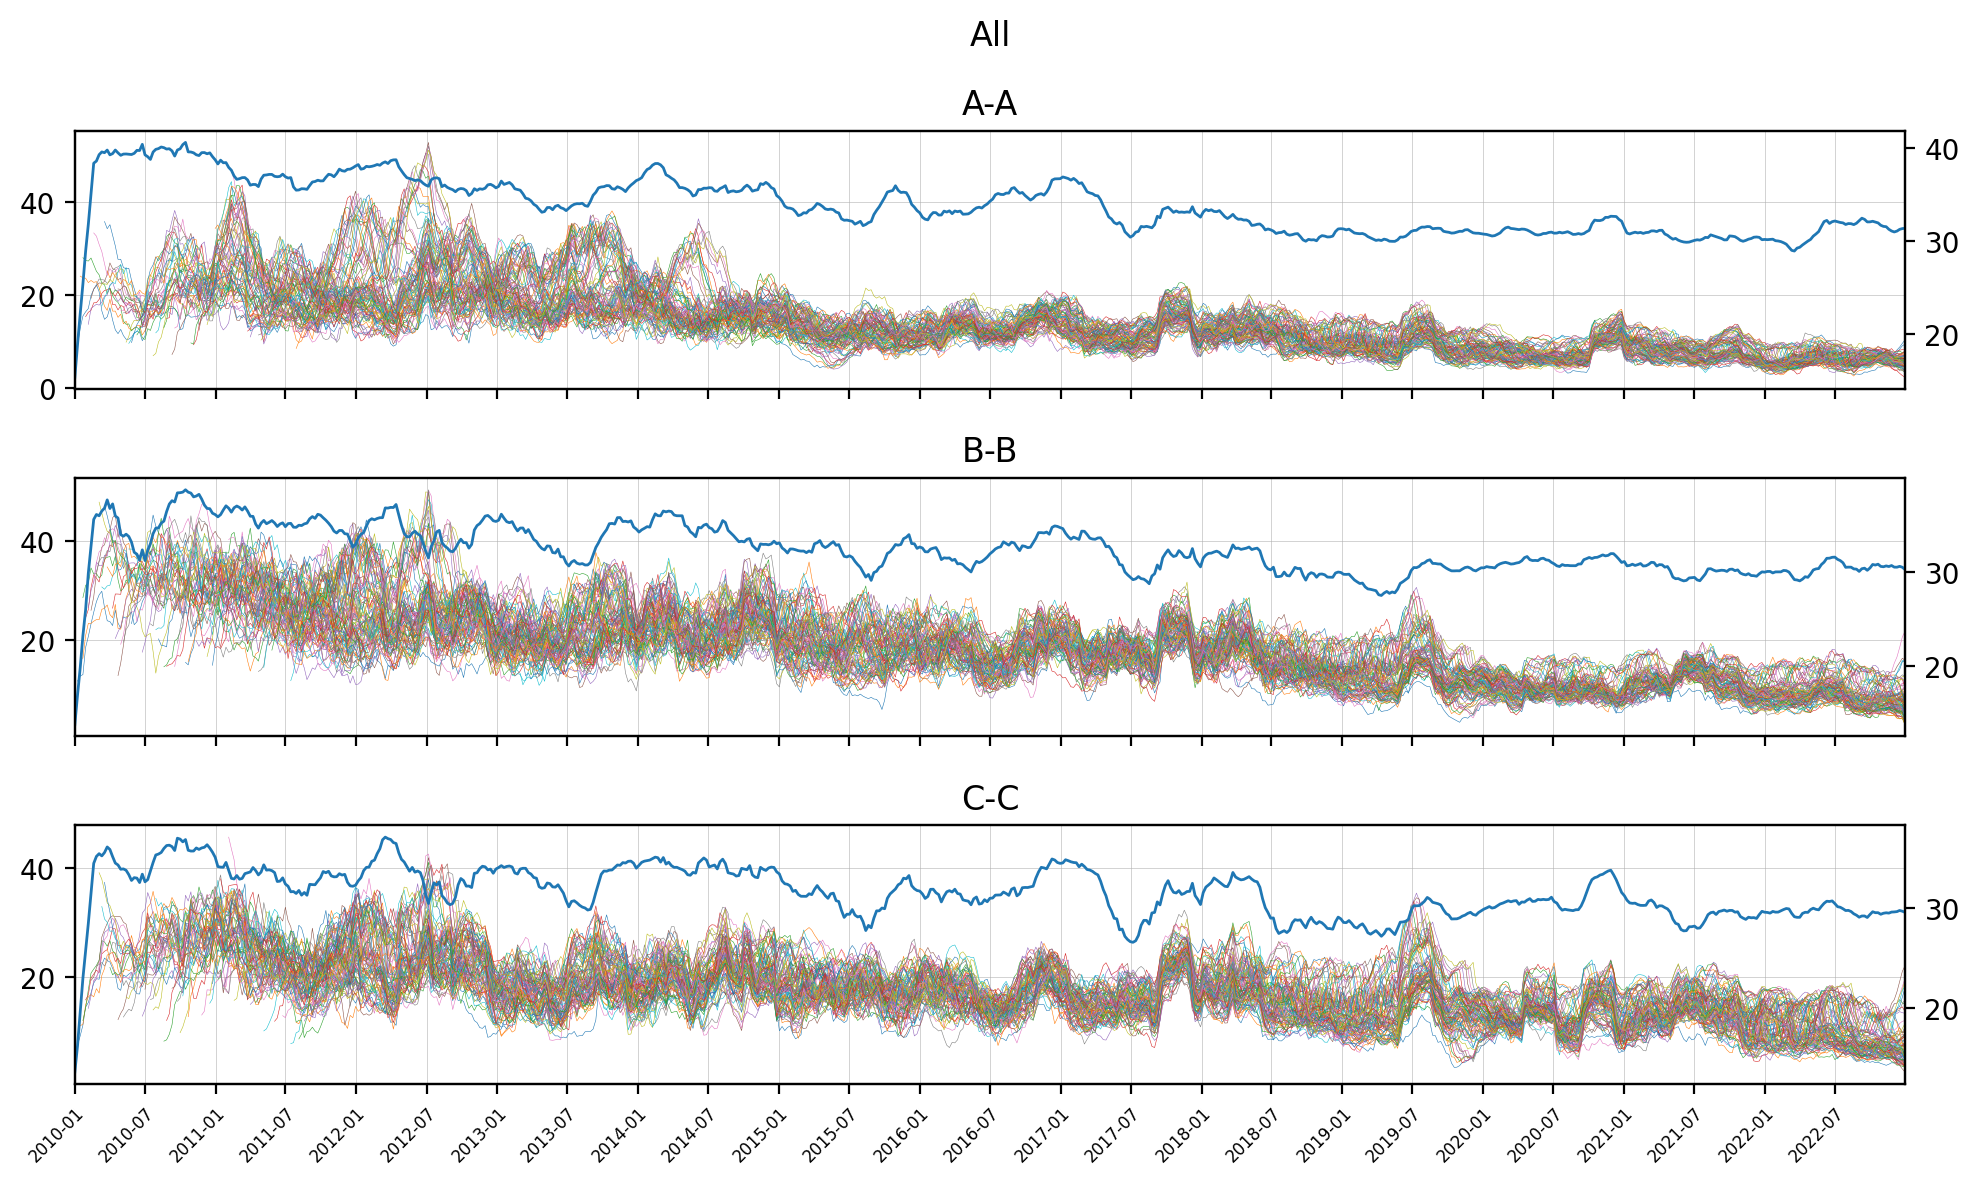

In [86]:
def plot_shifts(i: int, mode: Literal['self', 'refA', 'refB', 'refC'], avg=False, show=False):
    TECH_I, TECH, TECH_SUFF, c = tech_vars(i)
    print(TECH_I, TECH, TECH_SUFF)

    fig, axes = plt.subplots(nrows=3, figsize=(10, 6), dpi=200, sharex=True)
    buckets = [bucket['bucket'] for bucket in c.bucketed_tweets_panel_a]
    smoothing = 12

    def pltt(vA, vB, ax, tit, dev: list[tuple[str, np.ndarray]] | None = None):
        shifts = []
        for shift in range(1, 90):
            l2 = np.linalg.norm(vA[shift:] - vB[:-shift], axis=1)
            shifts.append(np.median(l2))
            ax.plot(buckets[shift:], smooth(l2, smoothing),
                    label=f'+{shift}', linewidth=0.2)

        if avg:
            shifts = np.array(shifts)
            v = np.min(shifts)
            hl1 = ax.axhline(v, lw=1, ls='--', c='red', label=f'min={v:.2f}@({np.argmin(shifts) + 1})')
            # ax.text(buckets[1], v, f'{v:.2f}@({np.argmin(shifts) + 1})', fontdict={'fontsize': 7})
            v = np.median(shifts)
            hl2 = ax.axhline(v, lw=1, ls='--', c='blue', label=f'median={v:.2f}@({len(shifts) // 2 + 1})')
            # ax.text(buckets[25], v, f'{v:.2f}@({len(shifts) // 2 + 1})', fontdict={'fontsize': 7})
            v = np.max(shifts)
            hl3 = ax.axhline(v, lw=1, ls='--', c='green', label=f'max={v:.2f}@({np.argmax(shifts) + 1})')
            # ax.text(buckets[50], v, f'{v:.2f}@({np.argmax(shifts) + 1})', fontdict={'fontsize': 7})
            lines = [hl1, hl2, hl3]
            ax.legend(lines, [l.get_label() for l in lines], fontsize=7)

        ax.set_title(tit)
        ax.grid(linewidth=0.2)
        if dev is not None:
            ax2 = ax.twinx()
            for lab, dat in dev:
                ax2.plot(buckets, dat, label=lab, linewidth=1)

    if mode == 'self':
        pltt(c.centroids_panel_a, c.centroids_panel_a, axes[0], 'A-A',
             dev=[('std(A)', smooth(c.deviations_panel_a, 12))])
        pltt(c.centroids_panel_b, c.centroids_panel_b, axes[1], 'B-B',
             dev=[('std(B)', smooth(c.deviations_panel_b, 12))])
        pltt(c.centroids_panel_c, c.centroids_panel_c, axes[2], 'C-C',
             dev=[('std(C)', smooth(c.deviations_panel_c, 12))])
    elif mode == 'refA':
        pltt(c.centroids_panel_a, c.centroids_panel_a, axes[0], 'A-A')
        pltt(c.centroids_panel_a, c.centroids_panel_b, axes[1], 'A-B')
        pltt(c.centroids_panel_a, c.centroids_panel_c, axes[2], 'A-C')
    elif mode == 'refB':
        pltt(c.centroids_panel_b, c.centroids_panel_a, axes[0], 'B-A')
        pltt(c.centroids_panel_b, c.centroids_panel_b, axes[1], 'B-B')
        pltt(c.centroids_panel_b, c.centroids_panel_c, axes[2], 'B-C')
    elif mode == 'refC':
        pltt(c.centroids_panel_c, c.centroids_panel_a, axes[0], 'C-A')
        pltt(c.centroids_panel_c, c.centroids_panel_b, axes[1], 'C-B')
        pltt(c.centroids_panel_c, c.centroids_panel_c, axes[2], 'C-C')
    else:
        raise ValueError()
    axes[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[-1].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.setp(axes[-1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=6)
    axes[-1].set_xlim(buckets[0], buckets[-1])

    fig.suptitle(TECH)
    fig.tight_layout()

    plt_show(fig, FIG_DIR / 'shifts' / f'bulk_{mode}{TECH_SUFF}', show=show)


plot_shifts(-1, mode='self', show=True)
# plot_shifts(-1, mode='refA', avg=True, show=True)
# plot_shifts(-1, mode='refB', avg=True, show=True)
# plot_shifts(-1, mode='refC', avg=True, show=True)

In [ ]:
for i in TECHS:
    plot_shifts(i, mode='self', avg=False, show=False)
    plot_shifts(i, mode='refA', avg=True, show=False)
    plot_shifts(i, mode='refB', avg=True, show=False)
    plot_shifts(i, mode='refC', avg=True, show=False)

-1 All _tech_all


/tmp/ipykernel_79202/1978444933.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


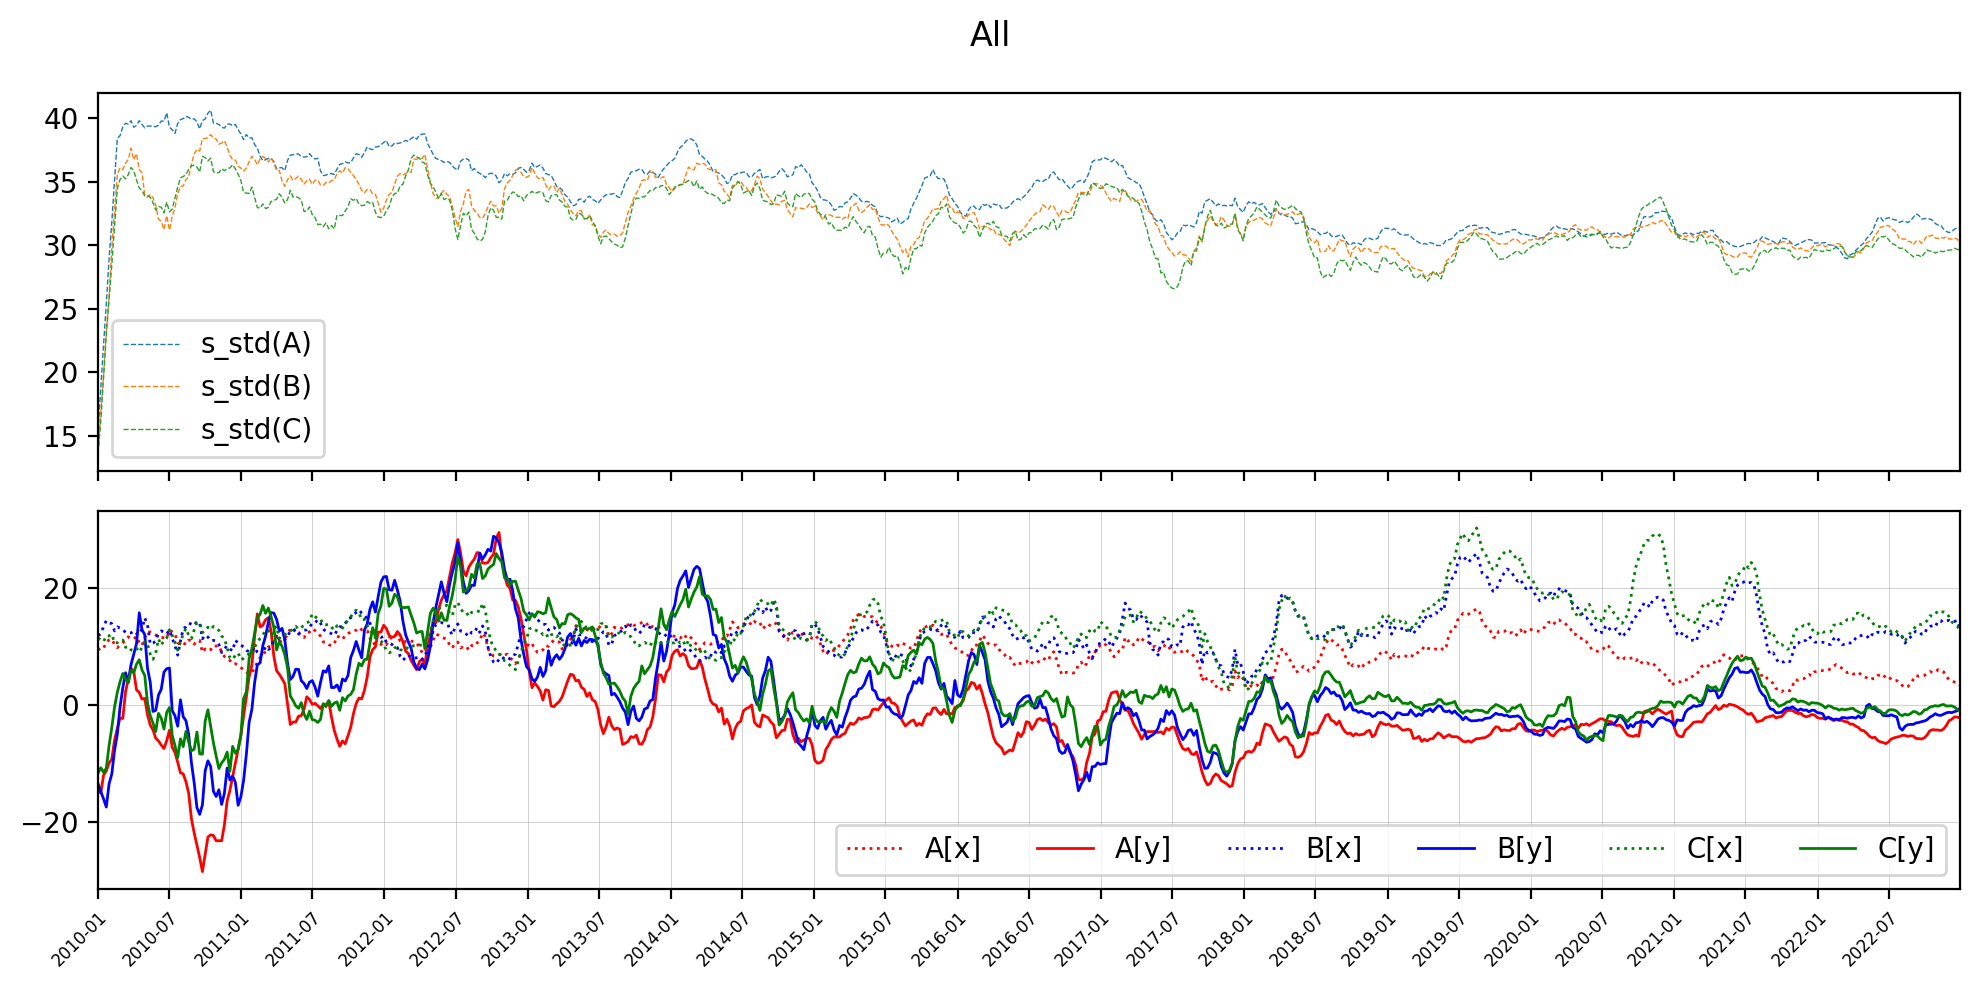

In [56]:
def plot_vecpos(i: int, show=False):
    TECH_I, TECH, TECH_SUFF, c = tech_vars(i)
    print(TECH_I, TECH, TECH_SUFF)
    fig, (ax2, ax) = plt.subplots(nrows=2, figsize=(10, 5), dpi=200, sharex=True)
    buckets = [bucket['bucket'] for bucket in c.bucketed_tweets_panel_a]
    smoothing = 12

    ax2.plot(buckets, smooth(c.deviations_panel_a, smoothing), label='s_std(A)', linewidth=0.5, ls='--')
    ax2.plot(buckets, smooth(c.deviations_panel_b, smoothing), label='s_std(B)', linewidth=0.5, ls='--')
    ax2.plot(buckets, smooth(c.deviations_panel_c, smoothing), label='s_std(C)', linewidth=0.5, ls='--')
    ax.grid(linewidth=0.2)
    ax2.legend()

    ax.plot(buckets, smooth(c.centroids_panel_a[:, 0], smoothing), label='A[x]', lw=1, c='red', ls=':')
    ax.plot(buckets, smooth(c.centroids_panel_a[:, 1], smoothing), label='A[y]', lw=1, c='red')
    ax.plot(buckets, smooth(c.centroids_panel_b[:, 0], smoothing), label='B[x]', lw=1, c='blue', ls=':')
    ax.plot(buckets, smooth(c.centroids_panel_b[:, 1], smoothing), label='B[y]', lw=1, c='blue')
    ax.plot(buckets, smooth(c.centroids_panel_c[:, 0], smoothing), label='C[x]', lw=1, c='green', ls=':')
    ax.plot(buckets, smooth(c.centroids_panel_c[:, 1], smoothing), label='C[y]', lw=1, c='green')
    ax.grid(linewidth=0.2)
    ax.legend(ncols=6)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=6)
    ax.set_xlim(buckets[0], buckets[-1])

    fig.suptitle(TECH)
    fig.tight_layout()

    plt_show(fig, FIG_DIR / 'centroid_pos' / f'vectors_pos{TECH_SUFF}', show=show)


plot_vecpos(-1, show=True)

In [ ]:
for i in TECHS:
    plot_vecpos(i, show=False)

-1 All _tech_all


/tmp/ipykernel_79202/1978444933.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


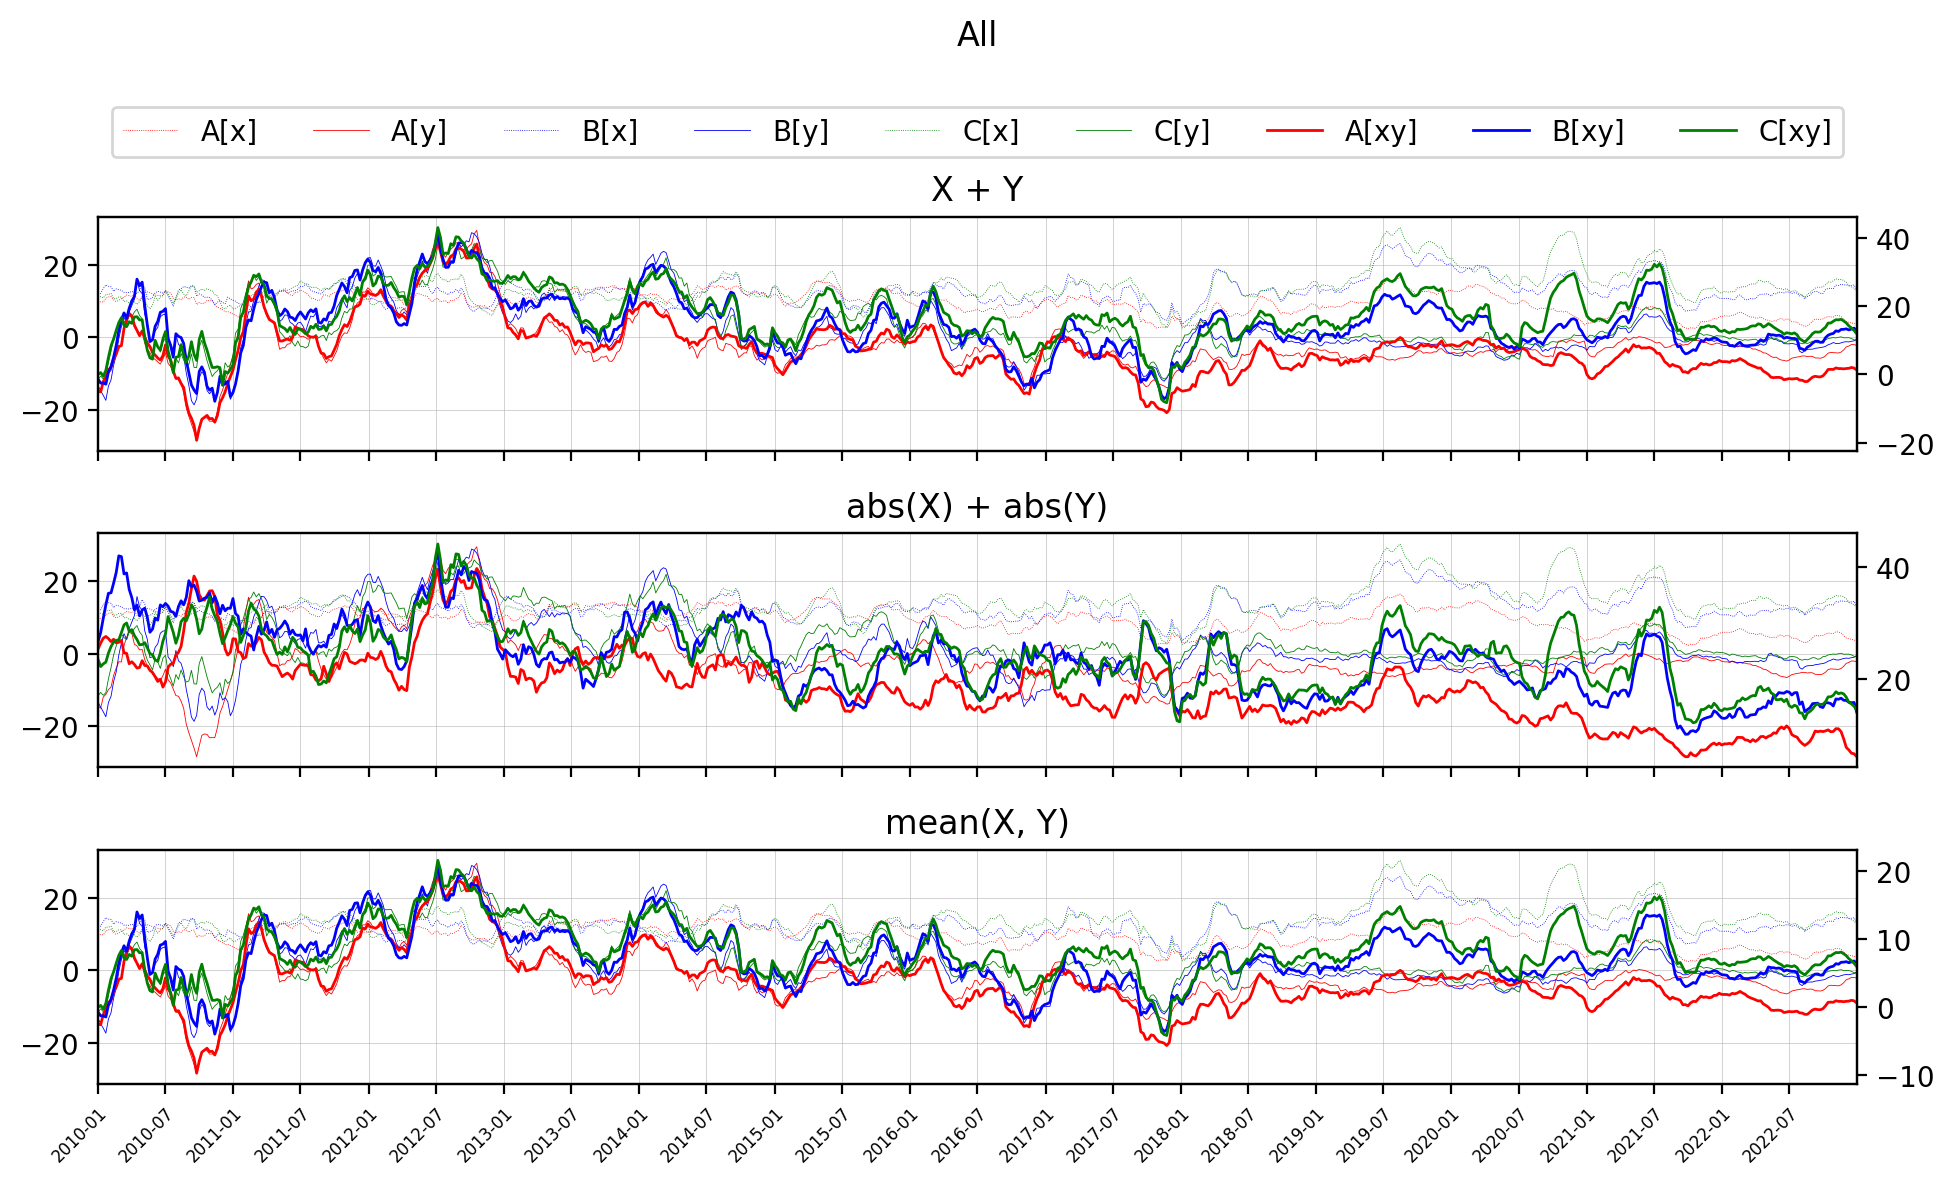

In [46]:
def plot_agg1d(i: int, show=False):
    TECH_I, TECH, TECH_SUFF, c = tech_vars(i)
    print(TECH_I, TECH, TECH_SUFF)
    fig, axes = plt.subplots(nrows=3, figsize=(10, 6), dpi=200, sharex=True)
    buckets = [bucket['bucket'] for bucket in c.bucketed_tweets_panel_a]
    smoothing = 12

    for ai, ax in enumerate(axes):
        # plot background (actual X/Y values)
        l1 = ax.plot(buckets, smooth(c.centroids_panel_a[:, 0], smoothing), label='A[x]', lw=0.3, c='red', ls=':')
        l2 = ax.plot(buckets, smooth(c.centroids_panel_a[:, 1], smoothing), label='A[y]', lw=0.3, c='red')
        l3 = ax.plot(buckets, smooth(c.centroids_panel_b[:, 0], smoothing), label='B[x]', lw=0.3, c='blue', ls=':')
        l4 = ax.plot(buckets, smooth(c.centroids_panel_b[:, 1], smoothing), label='B[y]', lw=0.3, c='blue')
        l5 = ax.plot(buckets, smooth(c.centroids_panel_c[:, 0], smoothing), label='C[x]', lw=0.3, c='green', ls=':')
        l6 = ax.plot(buckets, smooth(c.centroids_panel_c[:, 1], smoothing), label='C[y]', lw=0.3, c='green')
        ax.grid(linewidth=0.2)

        # plot 1D aggregation
        ax2 = ax.twinx()
        if ai == 0:
            ax.set_title('X + Y')
            l7 = ax2.plot(buckets, smooth(c.centroids_panel_a[:, 0] + c.centroids_panel_a[:, 1], smoothing),
                          label='A[xy]', lw=1, c='red')
            l8 = ax2.plot(buckets, smooth(c.centroids_panel_b[:, 0] + c.centroids_panel_b[:, 1], smoothing),
                          label='B[xy]', lw=1, c='blue')
            l9 = ax2.plot(buckets, smooth(c.centroids_panel_c[:, 0] + c.centroids_panel_c[:, 1], smoothing),
                          label='C[xy]', lw=1, c='green')

            lines = [l[0] for l in [l1, l2, l3, l4, l5, l6, l7, l8, l9]]
            ax.legend(lines, [l.get_label() for l in lines], bbox_to_anchor=[0.5, 1.5],
                      loc='upper center', ncol=9, borderaxespad=0.25)
        elif ai == 1:
            ax.set_title('abs(X) + abs(Y)')
            ax2.plot(buckets, smooth(np.abs(c.centroids_panel_a[:, 0]) + np.abs(c.centroids_panel_a[:, 1]), smoothing),
                     label='A[xy]', lw=1, c='red')
            ax2.plot(buckets, smooth(np.abs(c.centroids_panel_b[:, 0]) + np.abs(c.centroids_panel_b[:, 1]), smoothing),
                     label='B[xy]', lw=1, c='blue')
            ax2.plot(buckets, smooth(np.abs(c.centroids_panel_c[:, 0]) + np.abs(c.centroids_panel_c[:, 1]), smoothing),
                     label='C[xy]', lw=1, c='green')


        elif ai == 2:
            ax.set_title('mean(X, Y)')
            ax2.plot(buckets, smooth(np.mean(c.centroids_panel_a, axis=1), smoothing), label='A[xy]', lw=1, c='red')
            ax2.plot(buckets, smooth(np.mean(c.centroids_panel_b, axis=1), smoothing), label='B[xy]', lw=1, c='blue')
            ax2.plot(buckets, smooth(np.mean(c.centroids_panel_c, axis=1), smoothing), label='C[xy]', lw=1, c='green')

            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
            plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=6)

        ax.set_xlim(buckets[0], buckets[-1])

    fig.suptitle(TECH)
    fig.tight_layout()

    plt_show(fig, FIG_DIR / 'centroid_pos' / f'aggregated_1d{TECH_SUFF}', show=show)


plot_agg1d(-1, show=True)

In [ ]:
for i in TECHS:
    plot_agg1d(i, show=False)

In [33]:
from scipy.stats import pearsonr
import pandas as pd


def corr(i: int):
    TECH_I, TECH, TECH_SUFF, c = tech_vars(i)
    # print(TECH_I, TECH, TECH_SUFF)
    buckets = [bucket['bucket'] for bucket in c.bucketed_tweets_panel_a]
    smoothing = 12
    acc = {
        'x->x': np.zeros((3, 3)),
        'x->y': np.zeros((3, 3)),
        'y->y': np.zeros((3, 3)),
        'x+y': np.zeros((3, 3)),
        'abs x+y': np.zeros((3, 3)),
        'avg x+y': np.zeros((3, 3))
    }
    for ri, (pi, di) in enumerate([('A', c.centroids_panel_a), ('B', c.centroids_panel_b), ('C', c.centroids_panel_c)]):
        for rj, (pj, dj) in enumerate(
                [('A', c.centroids_panel_a), ('B', c.centroids_panel_b), ('C', c.centroids_panel_c)]):
            co = pearsonr(smooth(di[:, 0], smoothing), smooth(dj[:, 0], smoothing))
            acc['x->x'][ri][rj] = co.statistic
            # print(f'{pi}->{pj} (x->x): {co}')

            co = pearsonr(smooth(di[:, 0], smoothing), smooth(dj[:, 1], smoothing))
            acc['x->y'][ri][rj] = co.statistic
            # print(f'{pi}->{pj} (y->y): {co}')

            co = pearsonr(smooth(di[:, 1], smoothing), smooth(dj[:, 1], smoothing))
            acc['y->y'][ri][rj] = co.statistic
            # print(f'{pi}->{pj} (y->y): {co}')

            co = pearsonr(smooth(di[:, 0] + di[:, 1], smoothing), smooth(dj[:, 0] + dj[:, 1], smoothing))
            acc['x+y'][ri][rj] = co.statistic
            # print(f'{pi}->{pj} (x+y): {co}')

            co = pearsonr(smooth(np.abs(di[:, 0]) + np.abs(di[:, 1]), smoothing),
                          smooth(np.abs(dj[:, 0]) + np.abs(dj[:, 1]), smoothing))
            acc['abs x+y'][ri][rj] = co.statistic
            # print(f'{pi}->{pj} (abs x+y): {co}')

            co = pearsonr(smooth(np.mean(di, axis=1), smoothing), smooth(np.mean(dj, axis=1), smoothing))
            acc['avg x+y'][ri][rj] = co.statistic
        #     print(f'{pi}->{pj} (avg x+y): {co}')
        #     print('--')
        # print('===')
    return acc


a = corr(12)
for k in a.keys():
    df = pd.DataFrame(a[k], columns=['A', 'B', 'C'], index=['A', 'B', 'C'])
    print(k)
    print(df)

x->x
          A         B         C
A  1.000000  0.673567  0.706285
B  0.673567  1.000000  0.818143
C  0.706285  0.818143  1.000000
x->y
          A         B         C
A  0.748225  0.557746  0.557700
B  0.497559  0.615139  0.730432
C  0.456549  0.502860  0.683409
y->y
          A         B         C
A  1.000000  0.645081  0.530006
B  0.645081  1.000000  0.816296
C  0.530006  0.816296  1.000000
x+y
          A         B         C
A  1.000000  0.698585  0.629068
B  0.698585  1.000000  0.862349
C  0.629068  0.862349  1.000000
abs x+y
          A         B         C
A  1.000000  0.705848  0.718762
B  0.705848  1.000000  0.833579
C  0.718762  0.833579  1.000000
avg x+y
          A         B         C
A  1.000000  0.698585  0.629068
B  0.698585  1.000000  0.862349
C  0.629068  0.862349  1.000000


In [107]:
fld = ['x+y','abs x+y','avg x+y'][1]
print('\tA->B\tA->C\tC->B')
for i in TECHS:
    TECH_I, TECH, TECH_SUFF, c = tech_vars(i)
    accu = corr(i)
    print(f"{TECH}\n\t{accu[fld][1][0]:.4f}\t{accu[fld][2][0]:.4f}\t{accu[fld][2][1]:.4f}")

	A->B	A->C	C->B
All
	0.8658	0.7697	0.8608
Ocean Fertilization
	0.5992	0.7687	0.7023
Ocean Alkalinization
	-0.0298	0.7863	-0.0390
Enhanced Weathering
	0.3457	0.5369	0.5096
Biochar
	0.6508	0.5243	0.6746
Afforestation/Reforestation
	0.1439	0.0873	0.3840
Ecosystem Restoration
	0.0758	0.1273	0.4281
Soil Carbon Sequestration
	0.2721	0.1431	0.5149
BECCS
	0.5082	0.4726	0.4292
Blue Carbon
	0.5979	0.5067	0.8085
Direct Air Capture
	-0.4034	0.0453	0.5087
GGR (general)
	0.7058	0.7188	0.8336


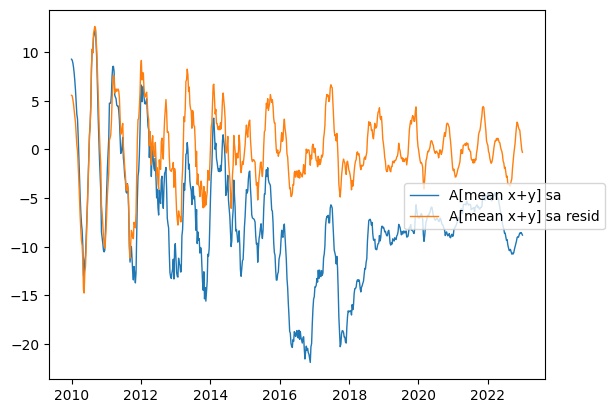

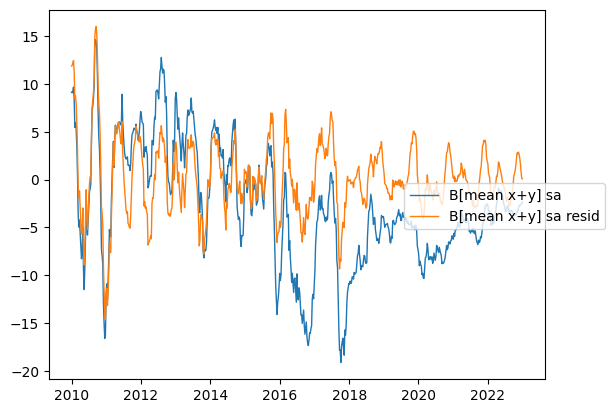

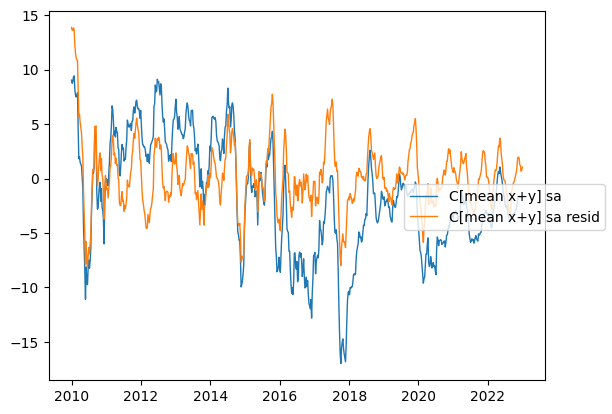

x->x
          A         B         C
A  1.000000  0.560156  0.534725
B  0.560156  1.000000  0.656948
C  0.534725  0.656948  1.000000
x->y
          A         B         C
A  0.475361  0.455993  0.506712
B  0.087533  0.297615  0.471703
C -0.062323  0.133353  0.578071
y->y
          A         B         C
A  1.000000  0.604371  0.283152
B  0.604371  1.000000  0.602491
C  0.283152  0.602491  1.000000
x+y
          A         B         C
A  1.000000  0.621663  0.341018
B  0.621663  1.000000  0.610837
C  0.341018  0.610837  1.000000
abs x+y
          A         B         C
A  1.000000  0.428162  0.544760
B  0.428162  1.000000  0.636707
C  0.544760  0.636707  1.000000
avg x+y
          A         B         C
A  1.000000  0.621663  0.341018
B  0.621663  1.000000  0.610837
C  0.341018  0.610837  1.000000


In [83]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd


def dt(sa: np.ndarray, sb: np.ndarray, period: int, plot: bool = False, pt: str | None = None,
       buckets: list | None = None):
    tsa = seasonal_decompose(sa, model='additive', extrapolate_trend='freq', period=period)
    tsb = seasonal_decompose(sb, model='additive', extrapolate_trend='freq', period=period)
    dtsa = sa - tsa.trend
    dtsb = sb - tsb.trend

    if plot and buckets:
        plt.plot(buckets, smooth(sa, 12), label=f'{pt} sa', lw=1)
        # plt.plot(buckets, smooth(dtsa,12), label=f'{pt} dt_sa', lw=1)
        # plt.plot(buckets, sa, label=f'{pt} sa', lw=1)
        # plt.plot(buckets, sa - tsa.seasonal, label=f'{pt} dt_sa', lw=1)
        # plt.plot(buckets, tsa.trend, label=f'{pt} sa trend', lw=1)
        # plt.plot(buckets, tsa.seasonal, label=f'{pt} sa seas', lw=1)
        plt.plot(buckets, smooth(tsa.resid, 12), label=f'{pt} sa resid', lw=1)
        plt.gcf().legend(loc='outside right')
        plt.show()

    # return pearsonr(dtsa, dtsb).statistic
    return pearsonr(smooth(tsa.resid, 12), smooth(tsb.resid, 12)).statistic


def corr_detrended(i: int, period: int = 52, plot: bool = False):
    TECH_I, TECH, TECH_SUFF, c = tech_vars(i)
    buckets = [bucket['bucket'] for bucket in c.bucketed_tweets_panel_a]
    smoothing = 12
    acc = {
        'x->x': np.zeros((3, 3)),
        'x->y': np.zeros((3, 3)),
        'y->y': np.zeros((3, 3)),
        'x+y': np.zeros((3, 3)),
        'abs x+y': np.zeros((3, 3)),
        'avg x+y': np.zeros((3, 3))
    }
    for ri, (pi, di) in enumerate([('A', c.centroids_panel_a), ('B', c.centroids_panel_b), ('C', c.centroids_panel_c)]):
        for rj, (pj, dj) in enumerate(
                [('A', c.centroids_panel_a), ('B', c.centroids_panel_b), ('C', c.centroids_panel_c)]):
            acc['x->x'][ri][rj] = dt(di[:, 0], dj[:, 0], period=period, plot=False, pt=pi + '[x]', buckets=buckets)
            acc['x->y'][ri][rj] = dt(di[:, 0], dj[:, 1], period=period, plot=False)
            acc['y->y'][ri][rj] = dt(di[:, 1], dj[:, 1], period=period, plot=False)
            acc['x+y'][ri][rj] = dt(di[:, 0] + di[:, 1], dj[:, 0] + dj[:, 1], period=period, plot=False)
            acc['abs x+y'][ri][rj] = dt(np.abs(di[:, 0]) + np.abs(di[:, 1]),
                                        np.abs(dj[:, 0]) + np.abs(dj[:, 1]), period=period, plot=False)
            acc['avg x+y'][ri][rj] = dt(np.mean(di, axis=1), np.mean(dj, axis=1),
                                        period=period, plot=plot and ri == rj, pt=pi + '[mean x+y]', buckets=buckets)

    return acc


a = corr_detrended(12, period=52, plot=True)

for k in a.keys():
    df = pd.DataFrame(a[k], columns=['A', 'B', 'C'], index=['A', 'B', 'C'])
    print(k)
    print(df)

In [82]:
print('\tA->B\tA->C\tC->B')
for i in TECHS:
    TECH_I, TECH, TECH_SUFF, c = tech_vars(i)
    accu = corr_detrended(i, period=52, plot=False)
    print(f"{TECH}\n\t{accu['avg x+y'][1][0]:.4f}\t{accu['avg x+y'][2][0]:.4f}\t{accu['avg x+y'][2][1]:.4f}")

	A->B	A->C	C->B
All
	0.7970	0.6829	0.8326
Ocean Fertilization
	-0.1458	-0.2694	0.1504
Ocean Alkalinization
	0.2979	-0.1364	0.0793
Enhanced Weathering
	0.0447	0.3631	0.1992
Biochar
	0.1144	0.2628	0.1103
Afforestation/Reforestation
	0.0218	0.3378	0.1682
Ecosystem Restoration
	0.0990	0.2523	-0.0567
Soil Carbon Sequestration
	0.2637	0.1710	0.3789
BECCS
	0.4298	0.0717	0.0706
Blue Carbon
	0.5064	0.4710	0.4444
Direct Air Capture
	-0.0846	0.1929	0.0948
GGR (general)
	0.6217	0.3410	0.6108


In [114]:
from statsmodels.tsa.seasonal import seasonal_decompose
import json

def dst(si,sj):
    # return np.linalg.norm((si.observed -si.resid)-(sj.observed-sj.resid),axis=0).sum()
    return np.linalg.norm(si.trend-sj.trend, axis=0).sum()

def scmp(di, dj, smoothing):
    acc = {}
    smi = seasonal_decompose(di[:, 0], model='additive', extrapolate_trend='freq', period=smoothing)
    smj = seasonal_decompose(dj[:, 0], model='additive', extrapolate_trend='freq', period=smoothing)
    acc['x->x'] = dst(smi, smj)
    smi = seasonal_decompose(di[:, 0], model='additive', extrapolate_trend='freq', period=smoothing)
    smj = seasonal_decompose(dj[:, 1], model='additive', extrapolate_trend='freq', period=smoothing)
    acc['x->y'] =  dst(smi, smj)
    smi = seasonal_decompose(di[:, 1], model='additive', extrapolate_trend='freq', period=smoothing)
    smj = seasonal_decompose(dj[:, 1], model='additive', extrapolate_trend='freq', period=smoothing)
    acc['y->y'] =  dst(smi, smj)
    smi = seasonal_decompose(di[:, 0] + di[:, 1], model='additive', extrapolate_trend='freq', period=smoothing)
    smj = seasonal_decompose(dj[:, 0] + dj[:, 1], model='additive', extrapolate_trend='freq', period=smoothing)
    acc['x+y'] =  dst(smi, smj)
    smi = seasonal_decompose(np.abs(di[:, 0]) + np.abs(di[:, 1]), model='additive', extrapolate_trend='freq', period=smoothing)
    smj = seasonal_decompose(np.abs(dj[:, 0]) + np.abs(dj[:, 1]), model='additive', extrapolate_trend='freq', period=smoothing)
    acc['abs x+y'] =  dst(smi, smj)
    smi = seasonal_decompose(np.mean(di, axis=1), model='additive', extrapolate_trend='freq', period=smoothing)
    smj = seasonal_decompose(np.mean(dj, axis=1), model='additive', extrapolate_trend='freq', period=smoothing)
    acc['avg x+y'] =  dst(smi, smj)

    dists = np.linalg.norm(di-dj, axis=1)
    sdists = seasonal_decompose(dists, model='additive', extrapolate_trend='freq', period=smoothing)
    acc['|vi-vj|'] = sdists.trend.sum()

    return acc


def abc(i: int, smoothing: int = 12):
    TECH_I, TECH, TECH_SUFF, c = tech_vars(i)
    buckets = [bucket['bucket'] for bucket in c.bucketed_tweets_panel_a]

    acc = {
        'A->B': scmp(c.centroids_panel_a,c.centroids_panel_b, smoothing),
        'A->C': scmp(c.centroids_panel_a,c.centroids_panel_c, smoothing),
        'B->C': scmp(c.centroids_panel_b,c.centroids_panel_c, smoothing)
    }

    return acc


print(json.dumps(abc(12, smoothing=12),indent=2))

{
  "A->B": {
    "x->x": 169.6315927277087,
    "x->y": 229.57398227410332,
    "y->y": 214.80320847665365,
    "x+y": 347.5014930824134,
    "abs x+y": 164.70971435259565,
    "avg x+y": 173.7507465412067,
    "|vi-vj|": 10019.801069180778
  },
  "A->C": {
    "x->x": 190.95527573377012,
    "x->y": 215.05567899583036,
    "y->y": 239.50264040965223,
    "x+y": 399.4789838239311,
    "abs x+y": 218.90710098575718,
    "avg x+y": 199.73949191196556,
    "|vi-vj|": 10316.2884544473
  },
  "B->C": {
    "x->x": 84.28230281152422,
    "x->y": 121.57119356797418,
    "y->y": 134.7927025191205,
    "x+y": 177.23400751394726,
    "abs x+y": 163.63495493243497,
    "avg x+y": 88.61700375697363,
    "|vi-vj|": 8418.511992198271
  }
}


In [115]:
fld = ['x+y','abs x+y','avg x+y','|vi-vj|'][3]
print('\tA->B\tA->C\tC->B')
for i in TECHS:
    TECH_I, TECH, TECH_SUFF, c = tech_vars(i)
    accu = abc(i, smoothing=12)
    print(f"{TECH}\n\t{accu['A->B'][fld]:.0f}\t{accu['A->C'][fld]:.0f}\t{accu['B->C'][fld]:.0f}")

	A->B	A->C	C->B
All
	7510	8425	5955
Ocean Fertilization
	7592	7882	8010
Ocean Alkalinization
	10396	12689	9758
Enhanced Weathering
	10471	10816	11073
Biochar
	7227	6982	7822
Afforestation/Reforestation
	8218	7243	6515
Ecosystem Restoration
	11165	9359	9553
Soil Carbon Sequestration
	5074	5090	4999
BECCS
	11730	11187	13375
Blue Carbon
	5092	5244	5080
Direct Air Capture
	17606	15940	16205
GGR (general)
	10020	10316	8419
